In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 1: Select a real-world dataset.



In this project, we select UCI wine quality dataset. It is a popular dataset used in machine learning and statistical analysis, consisting of two separate datasets for red and white wine samples. 

Step 2: Perform data preparation and cleaning

2.1 Load the dataset into Jupyter notebook

In [3]:
# Read the data
white_df = pd.read_csv('winequality-white.csv', sep=';')
red_df = pd.read_csv('winequality-red.csv', sep=';')

2.2 Explore the basic information about the data, e.g., size of data ranges, some basic statistics etc.

In [4]:
# Print data shape
print('white wine data shape:', white_df.shape)
print('red wine data shape:', red_df.shape)

white wine data shape: (4898, 12)
red wine data shape: (1599, 12)


In [5]:
# Print data info
print(white_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [6]:
print(red_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


The white wine dataset has 4898 rows and 12 columns, where 11 columns are float64 data type and 1 column is int64 data type. The red wine dataset has 1599 rows and 12 columns, where 11 columns are float64 data type and 1 column is int64 data type. Both datasets have the same number of columns, but the white wine dataset has significantly more samples than the red wine dataset.

Both datasets have no missing values, and the columns represent various chemical and physical properties of the wine. The quality column is the target variable, and the other columns are features that can be used to predict the quality of the wine.

2.3 Handle missing, incorrect and invalid data

In [7]:
# Check for missing values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in dataframes as all columns have 0 null values. The features in the dataset come from objective tests, so there are no invalid or incorrect values.

2.4 Perform any additional steps (parsing datas, feature engineering, create additional columns etc.)

In [66]:
# Merge the data
white_df['type'] = 'white'
red_df['type'] = 'red'

df = pd.concat([red_df, white_df], axis=0)

A new column named type is created in both dataframes with the respective values 'red' and 'white' and then these dataframes are concatenated.

Merging the data of red and white wine is done to create a larger and more diverse dataset that can improve the performance of machine learning models. Combining both datasets increases the number of samples, and thus can lead to more accurate predictions. Moreover, merging the data enables us to perform a more comprehensive analysis of wine properties and their effects on quality.

In [57]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


The new dataframe has 6497 rows and 13 columns, where 12 columns are float64 data type and 1 column is object data type.

Step 3: Perform exploratory analysis and visualization

3.1 Compute statistics for numeric columns

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


3.2 Explore distribution of numeric columns using histograms etc.

3.2.1 Histograms and boxplots of all numeric columns

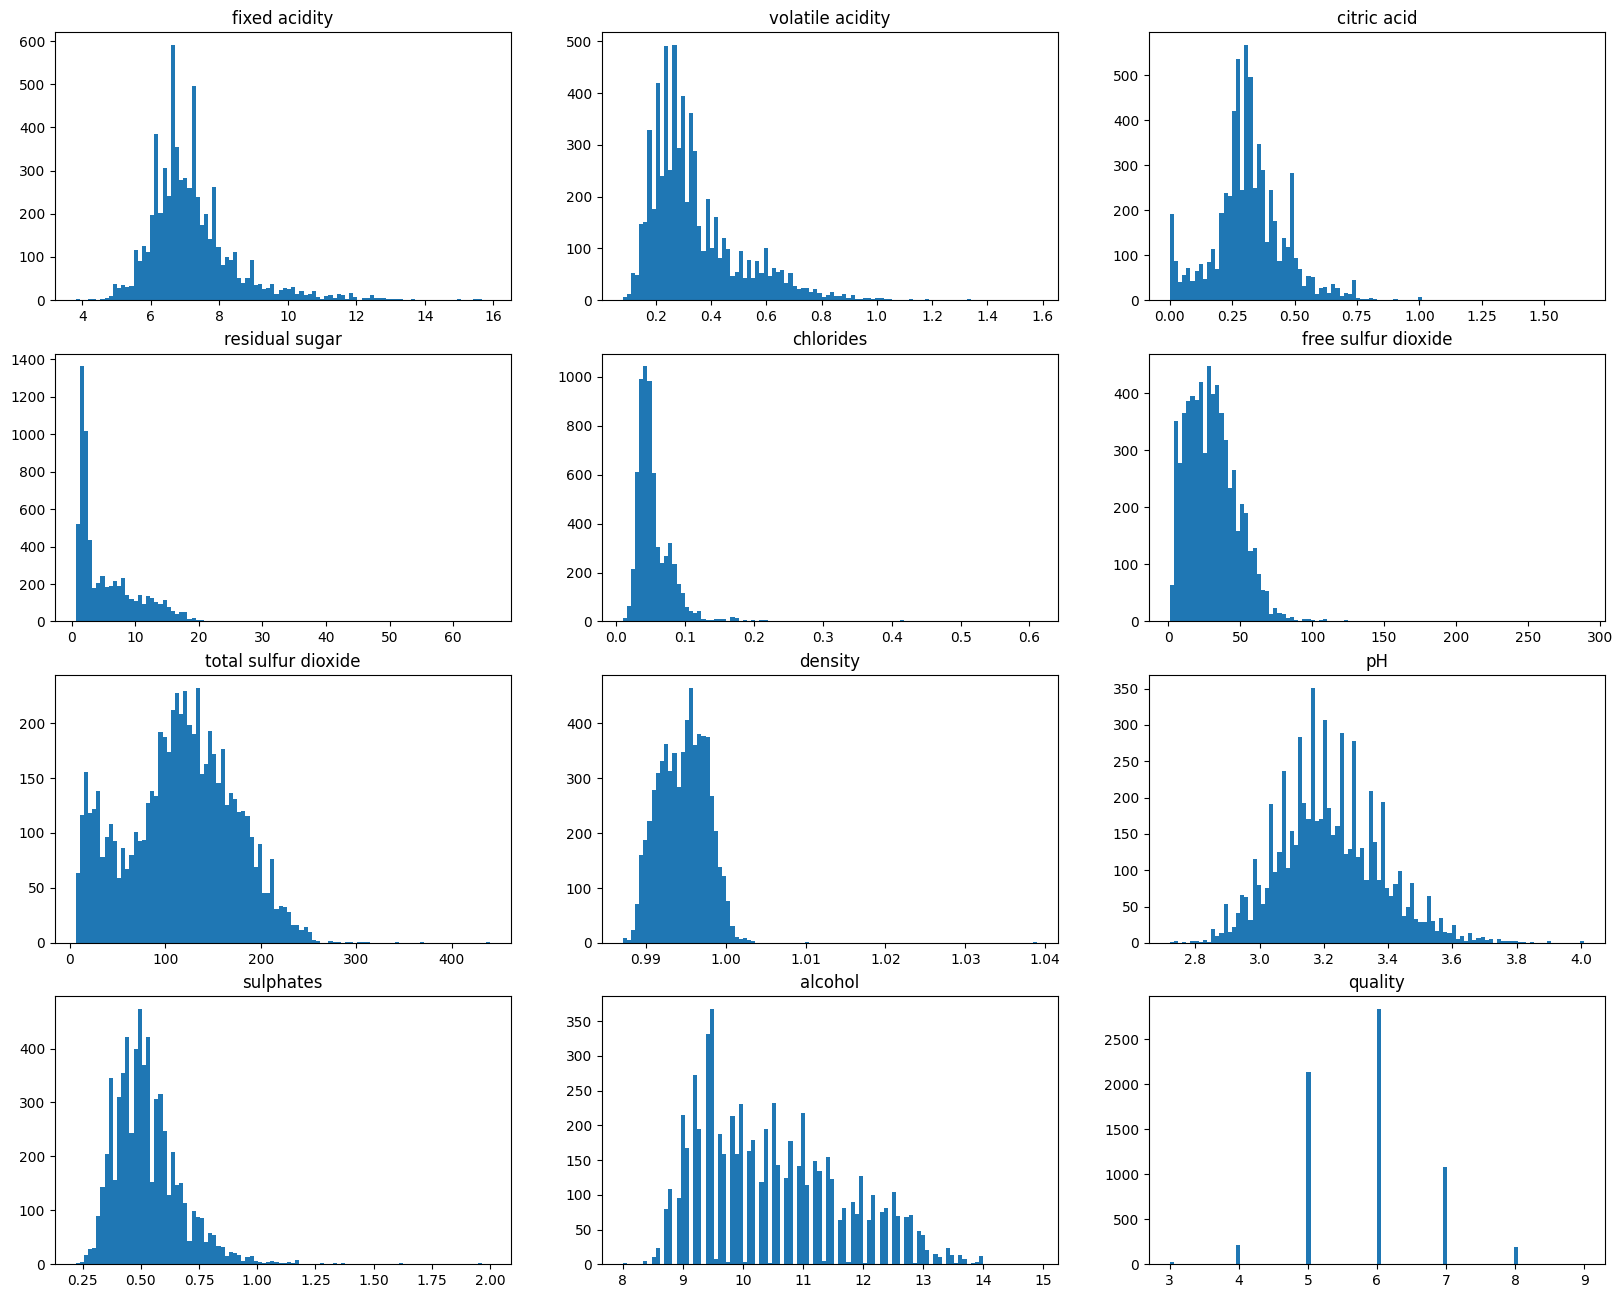

In [13]:
column = df.columns.tolist()

fig = plt.figure(figsize=(20,16))
for i in range(12):
    ax = fig.add_subplot(4, 3, i+1)
    ax.hist(df[column[i]],bins=100)
    ax.set_title(column[i])
plt.show()

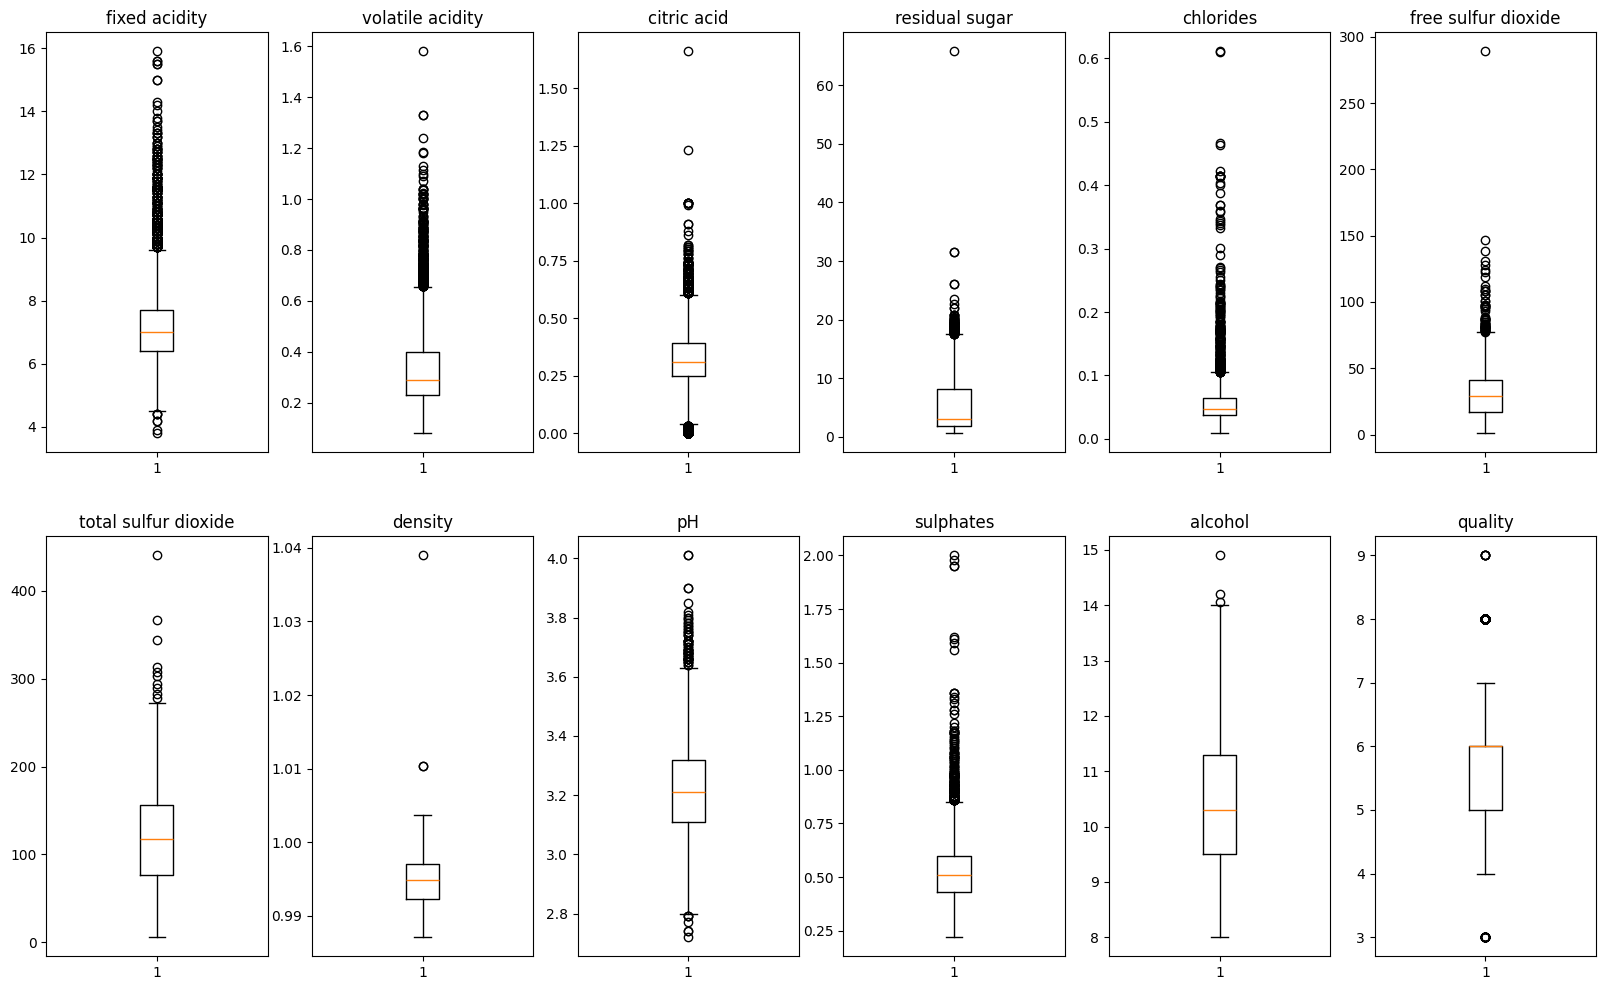

In [14]:
fig = plt.figure(figsize=(20,12))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.boxplot(df[column[i]])
    ax.set_title(column[i])
plt.show()

Fixed acidity: The distribution of wines is skewed towards lower levels of fixed acidity.

Volatile acidity: Most of the wines have low levels of volatile acidity, with a few having very high levels.

Citric acid: The majority of wines have low to moderate levels of citric acid, with a few having higher levels.

Residual sugar: Most wines have low levels of residual sugar, with only a few having higher levels.

Chlorides: The distribution of chlorides is highly skewed towards lower levels, with only a few wines having higher levels.

Free sulfur dioxide: The majority of wines have low levels of free sulfur dioxide, with only a few having higher levels.

Total sulfur dioxide: The distribution of total sulfur dioxide is skewed towards higher levels, with only a few wines having lower levels.

Density: The distribution of wines by density is highly skewed towards lower levels, with only a few having higher densities.

pH: The majority of wines have pH levels in the range of 3 to 4, with only a few having levels outside this range.

Sulphates: Most wines have low to moderate levels of sulphates, with only a few having very high levels.

Alcohol: The majority of wines have an alcohol content between 9.0% and 12.5%.

Quality: The majority of wines in the dataset have a quality rating of 5 or 6.

3.2.2 Histograms of all numeric columns for different types of wine

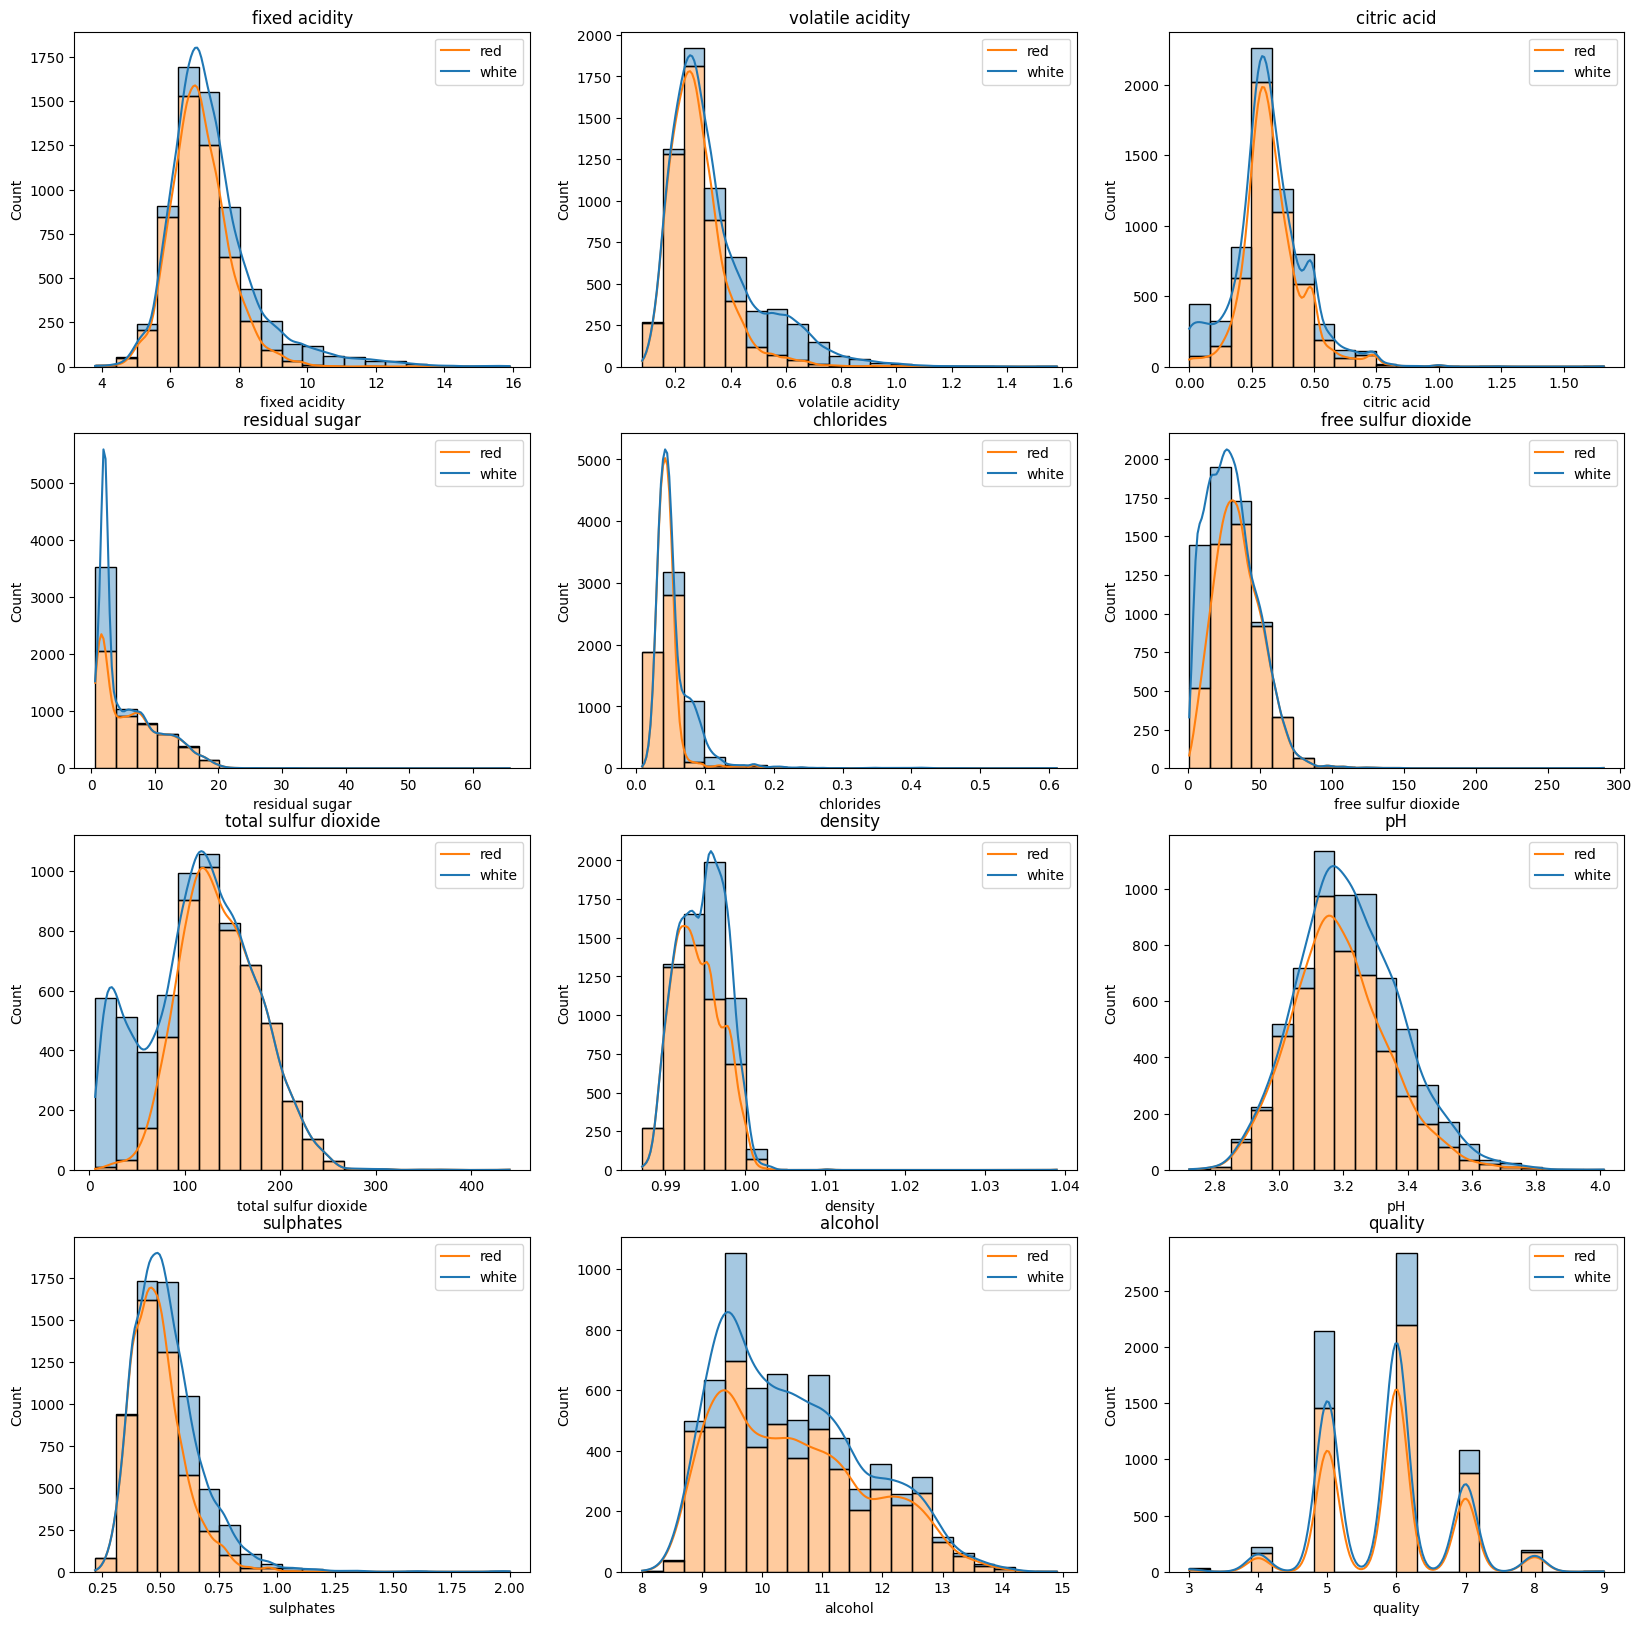

In [15]:
fig = plt.figure(figsize=(20,20))

for i in range(12):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df, x=column[i], hue='type', kde=True, alpha=0.4, bins=20, ax=ax, multiple='stack')
    plt.legend(['red', 'white'])
    ax.set_title(column[i])

plt.show()

3.2.3 Analysis of acid-related features

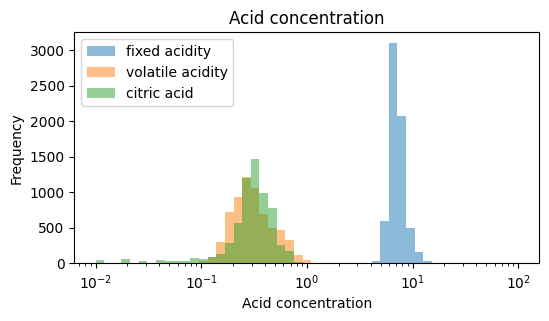

In [16]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2,2))
plt.hist(df['fixed acidity'], bins=bins, alpha=0.5)
plt.hist(df['volatile acidity'], bins=bins, alpha=0.5)
plt.hist(df['citric acid'], bins=bins, alpha=0.5)

plt.xscale('log')
plt.xlabel('Acid concentration')
plt.ylabel('Frequency')
plt.title('Acid concentration')
plt.legend(['fixed acidity', 'volatile acidity', 'citric acid'])
plt.show()

Because the fixed acidity values span a relatively narrow range (between 3.8 and 15.9), while the volatile acidity values span a much wider range (between 0.08 and 1.58). By using a logarithmic scale, we can more easily see the differences between the values that might otherwise be hard to distinguish.

From the histograms of the acid-related features, we can see that the highest concentration is observed in fixed acidity, followed by citric acid and volatile acidity, respectively. The concentration of citric acid and volatile acidity is relatively similar compared to fixed acidity.

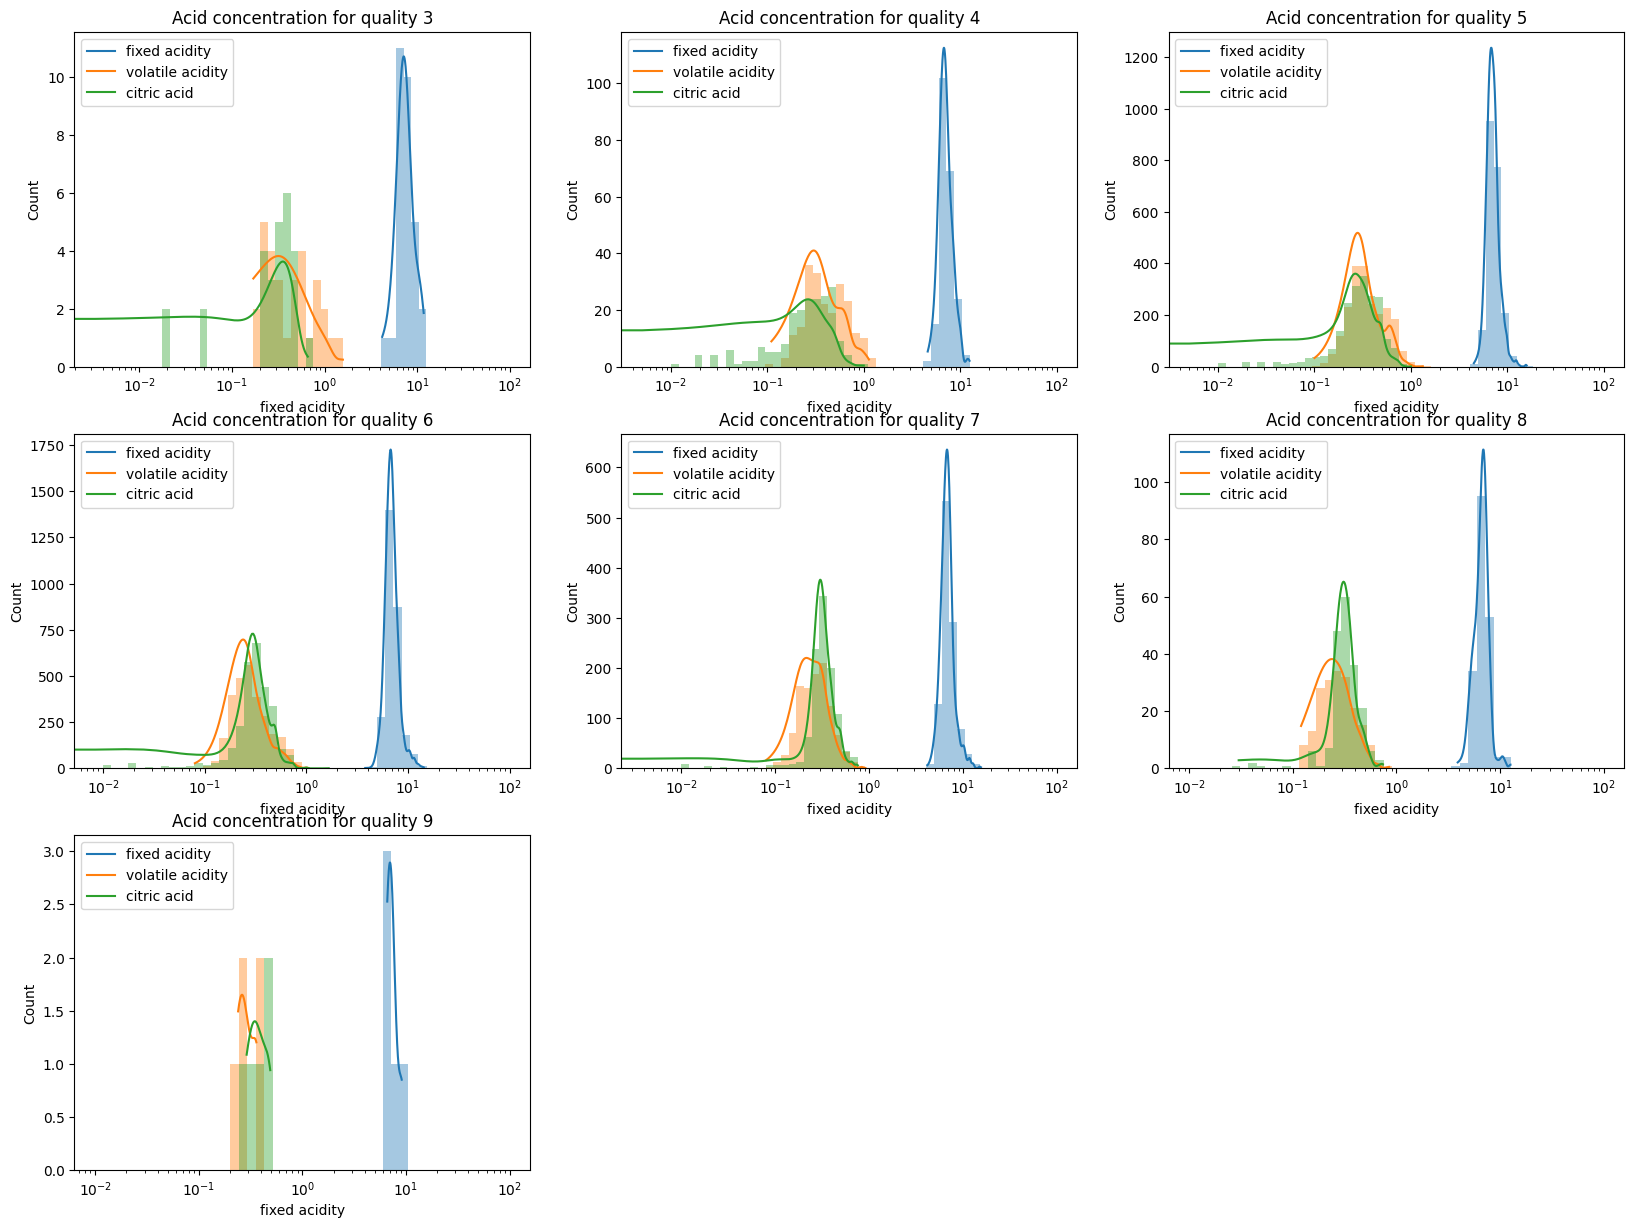

In [17]:
fig = plt.figure(figsize=(20,20))

for i in range(3, 10):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df[df['quality']==i], x='fixed acidity', ax=ax, bins=bins, kde=True, alpha=0.4)
    sns.histplot(data=df[df['quality']==i], x='volatile acidity', ax=ax, bins=bins, kde=True, alpha=0.4)
    sns.histplot(data=df[df['quality']==i], x='citric acid', ax=ax, bins=bins, kde=True, alpha=0.4,)
    plt.legend(['fixed acidity', 'volatile acidity', 'citric acid'])
    plt.xscale('log')
    ax.set_title('Acid concentration for quality {}'.format(i))

plt.show()

3.2.4 Analysis of sugar-related features

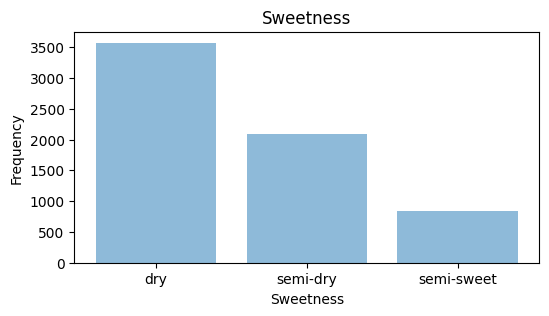

In [18]:
sweetness_df = pd.cut(df['residual sugar'], bins=[0,4,12,45], labels=['dry', 'semi-dry', 'semi-sweet'])

plt.figure(figsize=(6,3))
plt.bar(sweetness_df.value_counts().index, sweetness_df.value_counts(), alpha=0.5)
plt.xlabel('Sweetness')
plt.ylabel('Frequency')
plt.title('Sweetness')
plt.show()

From the histograms of the sugar-related characteristics, we can see that the most common type of wine in the dataset is "dry". This suggests that dry wines are more popular or more common than semi-dry or semi-sweet wines in the dataset. The second most common type of wine is "semi-dry". This indicates that semi-dry wines are also relatively common in the dataset. The least common type of wine is "semi-sweet". This suggests that semi-sweet wines are not as popular or common as dry or semi-dry wines in the dataset.

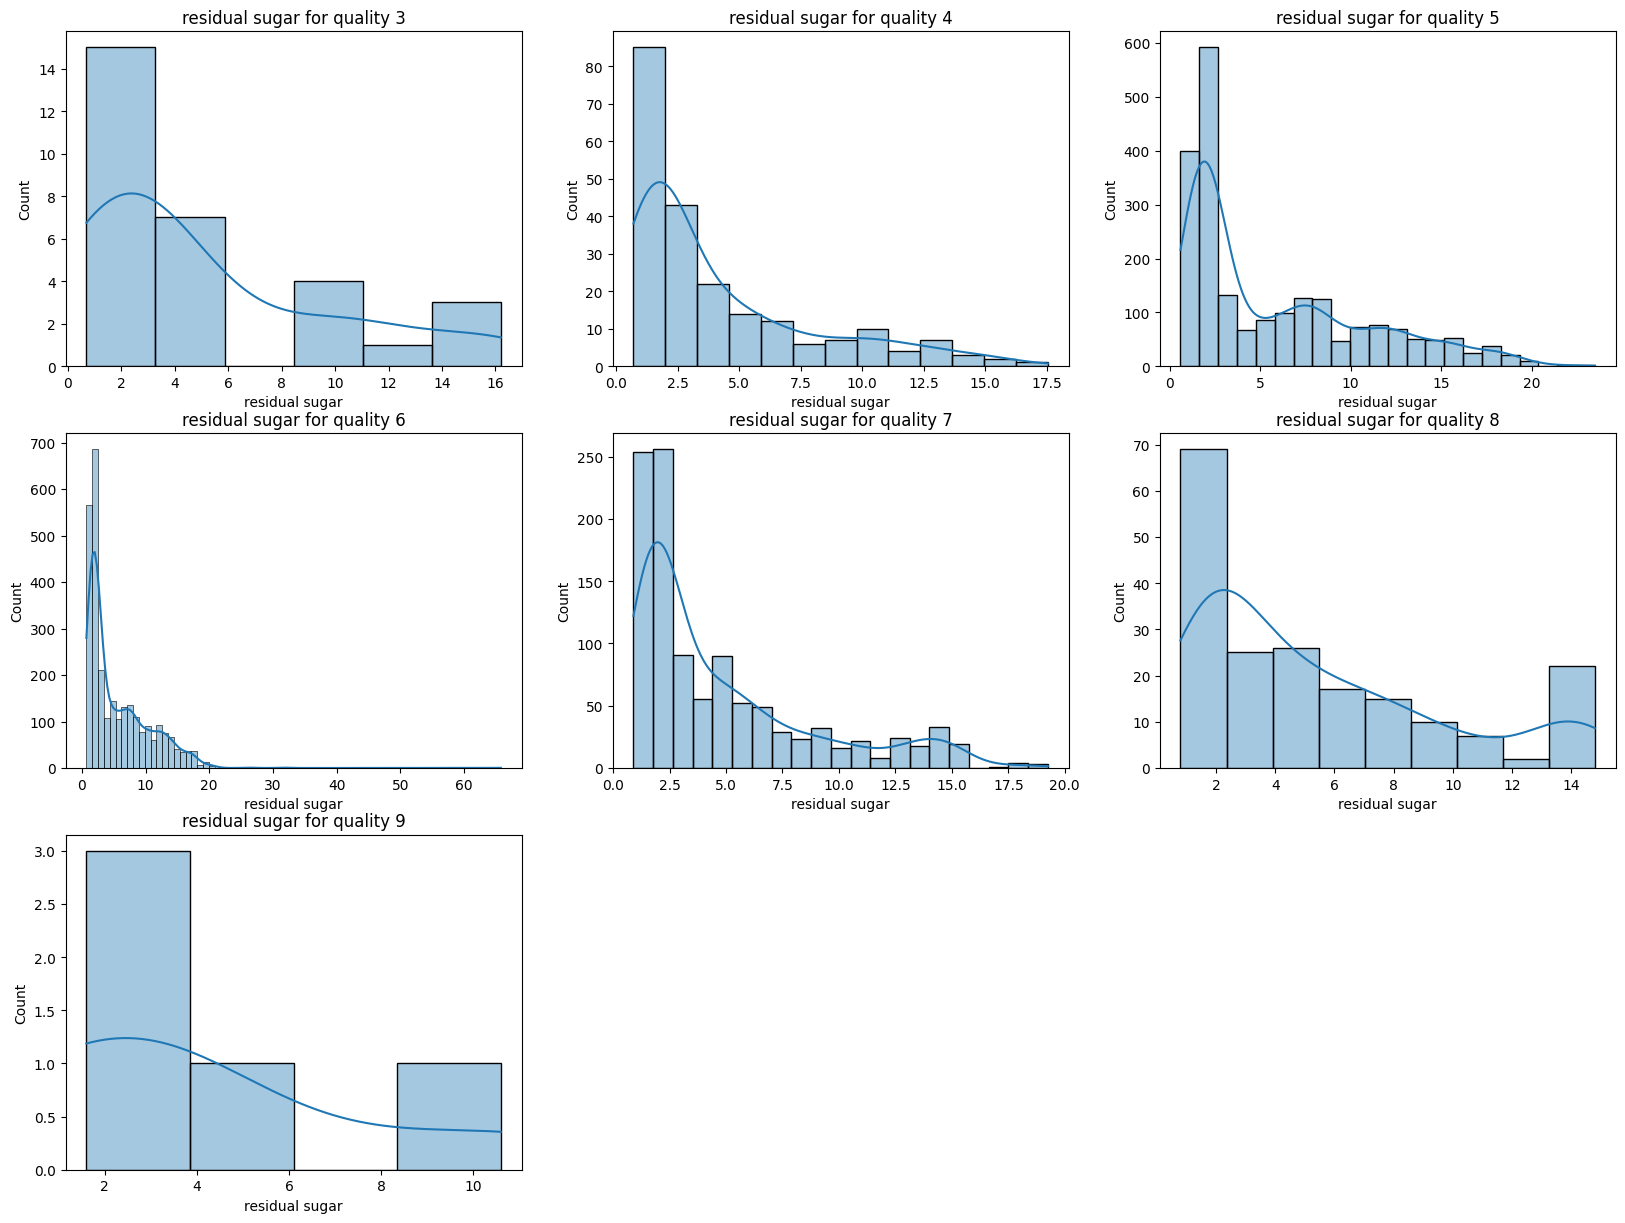

In [19]:
fig = plt.figure(figsize=(20,20))

for i in range(3, 10):
    ax = fig.add_subplot(4,3,i+1)
    sns.histplot(data=df[df['quality']==i], x='residual sugar', ax=ax, kde=True, alpha=0.4)
    ax.set_title('residual sugar for quality {}'.format(i))

plt.show()

3.3 Explore relationship between various columns

In [21]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

ValueError: could not convert string to float: 'red'

In the heapmap, we can see that:

Quality has moderate positive correlation with alcohol (0.44) and weak positive correlation with citric acid (0.09) and sulphates (0.04).

Quality has moderate negative correlation with volatile acidity (-0.27), chlorides (-0.20), and density (-0.31).

Fixed acidity has moderate positive correlation with citric acid (0.32).

Volatile acidity has moderate positive correlation with chlorides (0.38) and weak negative correlation with citric acid (-0.38).

Free sulfur dioxide has strong positive correlation with total sulfur dioxide (0.72).

Density has strong positive correlation with residual sugar (0.55) and moderate positive correlation with chlorides (0.36).

pH does not show strong correlation with any of the predictor variables or with quality.

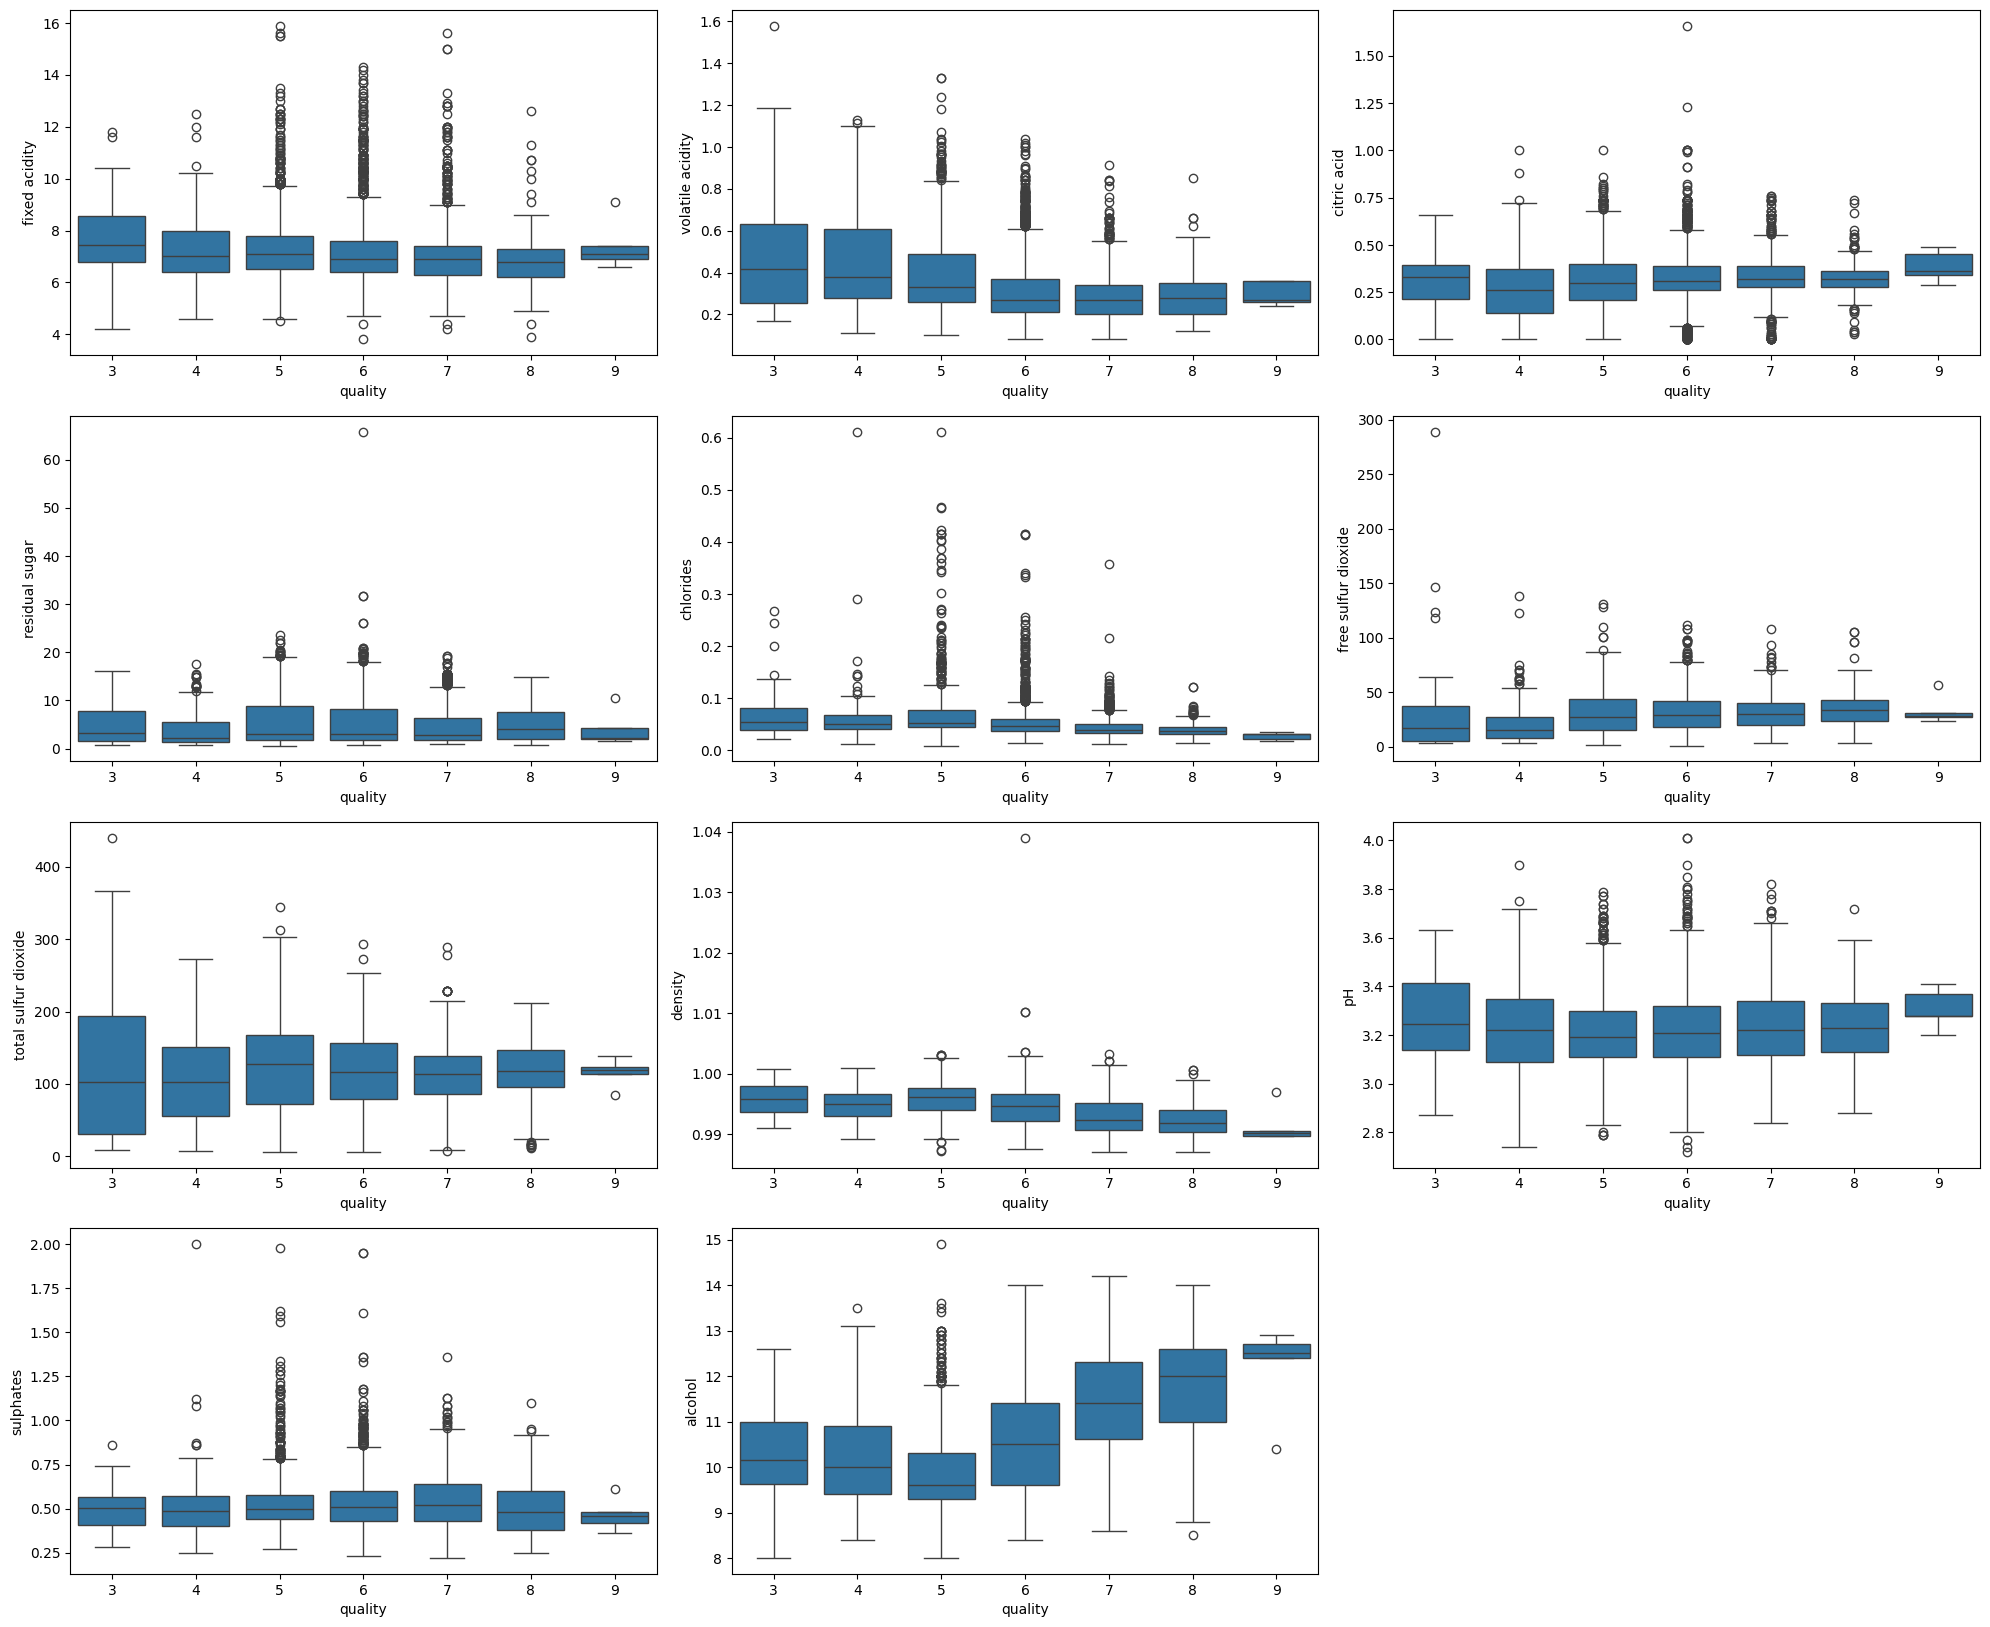

In [22]:
plt.figure(figsize=(20,20))
for i in range(11):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = 'quality', y = column[i], data = df)
    plt.ylabel(column[i])
plt.tight_layout()

In the boxplot, we can see that:

The quality of wine is positively correlated with citric acid, free sulfur dioxide and alocohol.


The quality of wine was negatively correlated with fixed acidity, volatile acidity, chlorides and density.

The quality of wine was not correlated with residual sugar, total sulfur dioxide, pH and sulphates.

3.4 Make a note of interesting insights from the exploratory analysis

In [55]:
# Check for class imbalance
print(df['quality'].value_counts())

quality
0    6251
1     246
Name: count, dtype: int64


It shows that the quality values in the data set are not balanced. Specifically, there are only a few samples with a quality of 3, 4, 8 and 9, while there are many samples with a quality of 5, 6, and 7. This is an example of class imbalance.

Step 4: Train and evaluate two machine learning models, tune hyperparameters and reduce the overfitting to improve the model.  Evaluate the performance of the models using the metrics and diagnostics. 

In [104]:
from sklearn.preprocessing import LabelEncoder

df['quality'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['bad', 'normal', 'good'])

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,normal,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal,red



Due to the imbalance of the dataset, we decided to categorized quality from 0 to 4 as bad, from 5 to 6 as normal, and from 6 to 10 as
good. We convert a continuous target variable into a categorical variable. We split the 'quality' column into three categories: 'bad', 'normal', and 'good', based on the values in the 'quality' column. 

In [108]:
from sklearn.model_selection import train_test_split

# Split into X (features) and y (target)
X = df.drop('quality', axis=1)
y = df['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We splited the dataset into two parts, one for training the models, the other for testing purpose.

In [109]:
from sklearn.preprocessing import StandardScaler

def normalize_dataframe(df):
    # Initialize StandardScaler
    scaler = StandardScaler()
    # Fit and transform the DataFrame
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

# Scale the features
scaler = StandardScaler()
X_train_scaled = normalize_dataframe(X_train)
X_test_scaled = normalize_dataframe(X_test)

In [110]:
X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.468229,-0.599512,0.205467,0.464612,-0.712801,0.311659,0.343566,-0.296146,-0.168884,-1.083266,0.013766,0.565129
1,0.851500,-0.352849,1.104063,-0.702999,1.067470,-1.408735,-1.847518,-0.203072,0.269679,0.598577,1.608717,-1.769509
2,0.385713,2.329612,-2.144710,-0.702999,0.234762,0.024927,-1.295294,-0.326062,1.209455,0.262208,1.105048,-1.769509
3,-1.555065,0.202143,0.067221,-0.890650,-0.798944,-1.007309,-0.618374,-1.492810,0.958848,-1.015992,1.021103,0.565129
4,-0.468229,-0.476180,1.657046,2.070076,-0.081092,0.082273,0.450448,1.133204,-0.670098,-0.275981,-0.993572,0.565129


 In the wine dataset, the 'alcohol' feature has a range of values from 8.0 to 14.9, while the 'total sulfur dioxide' feature has a range of values from 6.0 to 440.0. If we use these features without scaling, the algorithm may give more importance to the 'total sulfur dioxide' feature, simply because it has larger values, even though 'alcohol' may be more important in determining wine quality. So we need to scale the features so that they have a uniform range.

In [28]:
import itertools

from sklearn.metrics import accuracy_score, precision_score, recall_score


# List of wine attributes
wine_attributes = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Function to generate combinations of attributes
def generate_combinations():
    all_combinations = []
    for r in range(1, len(wine_attributes) + 1):
        combinations = list(itertools.combinations(wine_attributes, r))
        all_combinations.extend(combinations)
    return all_combinations


# Generate combinations
all_combinations = generate_combinations()

print (len(all_combinations))


2047


There are total 2047 combinations of 11 attributes. We wanted to know what combinations of attributes make better prediction.

In [200]:
# save the model results into a txt file
def write_model_results(file_path, model_name, results):
    """
    Write the model results to a text file.

    Parameters:
    - file_path (str): The path to the text file to write the results.
    - model_name (str): The name of the model (e.g., 'GB Results').
    - results (list): List of tuples containing the model results.
    """
    with open(file_path, 'w') as file:
        file.write(f"{model_name}:\n")
        for result in results:
            attributes, accuracy, precision, recall = result
            file.write(f"Attributes: {attributes}, Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}\n")

# read txt file of model results
def read_model_results(file_path):
    """
    Read the model results from a text file.

    Parameters:
    - file_path (str): The path to the text file containing the model results.

    Returns:
    - List of tuples containing the model results.
    """
    results = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[1:]:
            line = line.strip()
            split_line = line.split('), ')  
            attributes_str = split_line[0]
            metrics_str = split_line[1]
            attributes = attributes_str.replace("Attributes: (", "").split(', ')
            accuracy = float(metrics_str.split(',')[0].split(':')[1].strip())
            precision = float(metrics_str.split(',')[1].split(':')[1].strip())
            recall = float(metrics_str.split(',')[2].split(':')[1].strip())
            results.append((attributes, accuracy, precision, recall))

    return results

In [ ]:
from tabulate import tabulate

def find_high_performance(results, threshold_accuracy=0.5, threshold_precision=0.5, threshold_recall=0.5):
    """
    Function to filter results based on high accuracy, precision, and recall.
    
    Parameters:
    - results: List of tuples containing (attributes, accuracy, precision, recall).
    - threshold_accuracy: Minimum accuracy threshold.
    - threshold_precision: Minimum precision threshold.
    - threshold_recall: Minimum recall threshold.
    
    Returns:
    - List of tuples containing (attributes, accuracy, precision, recall) that meet the criteria.
    """
    high_performance_results = []
    for result in results:
        attributes, accuracy, precision, recall = result
        if accuracy >= threshold_accuracy and precision >= threshold_precision and recall >= threshold_recall:
            high_performance_results.append(result)
    return high_performance_results

def graph_model_performance(results):
        attributes_counts = [1,2,3,4,5,6,7,8,9,10,11]
        accuracies = [0] *12
        precisions = [0] *12
        recalls = [0] *12

        def replace_if_bigger(list, index, value):
                if list[index] < value:
                        list[index] = value

        for result in results:
                attributes, accuracy, precision, recall = result
                attribute_length = len(attributes)
                replace_if_bigger(accuracies, attribute_length, accuracy)
                replace_if_bigger(precisions, attribute_length, precision)
                replace_if_bigger(recalls, attribute_length, recall)

        plt.plot(attributes_counts, accuracies[1:], label='Accuracy')
        plt.plot(attributes_counts, precisions[1:], label='Precision')
        # plt.plot(attributes_counts, recalls[1:], label='Recall') 

        plt.xlabel('Number of Attributes')
        plt.ylabel('Value')
        plt.title('Performance Metrics vs. Number of Attributes')
        plt.legend()
        plt.grid(True)

        # Show plot
        plt.show()

"find_high_performance" function filters results based on high accuracy, precision, and recall.
"graph_model_performance" function plots the highest performance metrics (accuracy, precision, and recall) against the number of attributes used in the classification models.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Lists to store results
svc_results = []

# Function to train SVC model for a combination of attributes
def train_svc_model(attributes, wine_df):
    X_train = X_train_scaled[list(attributes)]
    X_test = X_test_scaled[list(attributes)]
    clf = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, y_pred

In [ ]:
# Train model for all combinations for all wine
for i, combination in enumerate(all_combinations):
    if i %50 == 0:
        print("Finished: ", i)
    svc_accuracy, svc_precision, svc_recall, svc_predict = train_svc_model(combination, df)    
    svc_results.append((combination, svc_accuracy, svc_precision, svc_recall))
 

In [177]:
# save the result to a txt file 
write_model_results('svc_model_results.txt', 'SVC Results', svc_results)

This script trains Support Vector Classifier (SVC) models for all combinations of attributes using the wine dataset. It first defines a function train_svc_model to train an SVC model for a given combination of attributes. Then, it iterates over all combinations of attributes, trains an SVC model for each combination using the function, and stores the results (accuracy, precision, and recall) in a list called svc_results. Finally, it writes the results to a text file named model_results.txt. The results include the attributes used, as well as the corresponding accuracy, precision, and recall scores for each combination of attributes.

In [213]:
high_performance_svc = find_high_performance(svc_results,threshold_accuracy=0.8, threshold_precision=0.8, threshold_recall=0.8)

for result in high_performance_svc:
    print(result)

(('volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'), 0.8, 0.8011027434104356, 0.8)


We filtered out the low performance results and keep the ones with equal and greater then 0.8 accuracy, precision and recall.

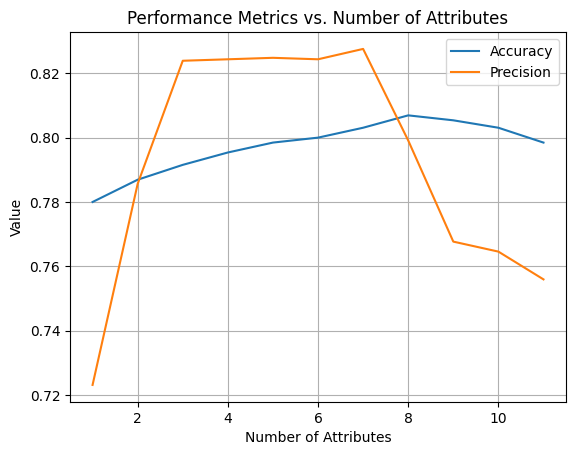

In [162]:
graph_model_performance(svc_results)

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

gb_results = []

# Function to train Gradient Boosting Classifier model for a combination of attributes
def train_gradient_boosting_model(attributes):
    X_train = X_train_scaled[list(attributes)]
    X_test = X_test_scaled[list(attributes)]
    clf = GradientBoostingClassifier(n_estimators=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall



In [ ]:

for i, combination in enumerate(all_combinations):
    if i %50 == 0:
        print("Finished: ", i)
    gb_accuracy, gb_precision, gb_recall = train_gradient_boosting_model(combination)
    gb_results.append((combination, gb_accuracy, gb_precision, gb_recall))
 

In [201]:
# read file from txt file
gb_results = read_model_results('gb_model_results.txt')

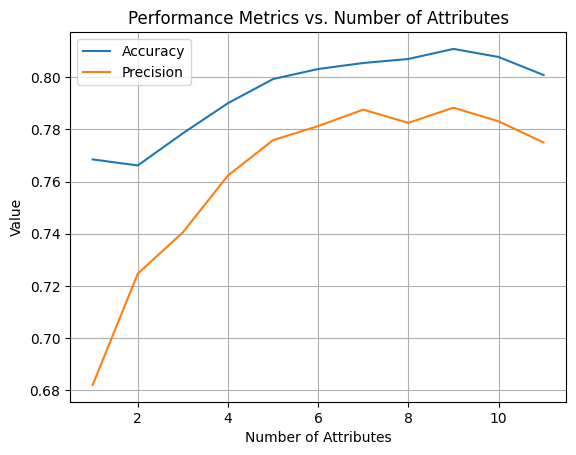

(["'fixed acidity'", "'volatile acidity'", "'citric acid'", "'residual sugar'", "'chlorides'", "'free sulfur dioxide'", "'pH'", "'sulphates'", "'alcohol'"], 0.81077, 0.78826, 0.81077)


In [212]:
graph_model_performance(gb_results)
high_performance_gb = find_high_performance(gb_results,threshold_accuracy=0.8, threshold_precision=0.788, threshold_recall=0.8)

for result in high_performance_gb:
    print(result)

In [153]:
from sklearn.tree import DecisionTreeClassifier

dt_results = []

# Function to train Decision Tree Classifier model for a combination of attributes
def train_decision_tree_model(attributes):
    X_train = X_train_scaled[list(attributes)]
    X_test = X_test_scaled[list(attributes)]
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall


In [ ]:
for i, combination in enumerate(all_combinations):
    if i % 50 == 0:
        print("Finished: ", i)
    dt_accuracy, dt_precision, dt_recall = train_decision_tree_model(combination)
    dt_results.append((combination, dt_accuracy, dt_precision, dt_recall))

In [179]:
# save the result to a txt file 
write_model_results('dt_model_results.txt', 'DT Results', dt_results)

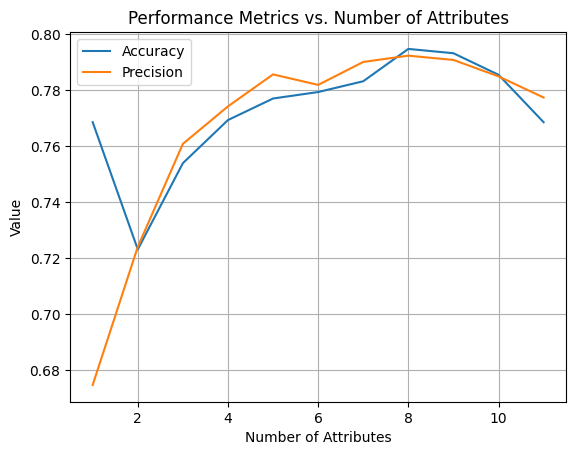

(('volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), 0.7946153846153846, 0.792208383250216, 0.7946153846153846)
(('fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), 0.7915384615384615, 0.7882624044743366, 0.7915384615384615)
(('citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), 0.7930769230769231, 0.7906796946353313, 0.7930769230769231)


In [209]:
graph_model_performance(dt_results)

high_performance_dt = find_high_performance(dt_results,threshold_accuracy=0.79, threshold_precision=0.78, threshold_recall=0.75)

for result in high_performance_dt:
    print(result)

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf_results = []

# Function to train Random Forest Classifier model for a combination of attributes
def train_random_forest_model(attributes):
    X_train = X_train_scaled[list(attributes)]
    X_test = X_test_scaled[list(attributes)]
    clf = RandomForestClassifier(n_estimators=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall


In [ ]:

for i, combination in enumerate(all_combinations):
    if i % 50 == 0:
        print("Finished: ", i)
    rf_accuracy, rf_precision, rf_recall = train_random_forest_model(combination)
    rf_results.append((combination, rf_accuracy, rf_precision, rf_recall))
 

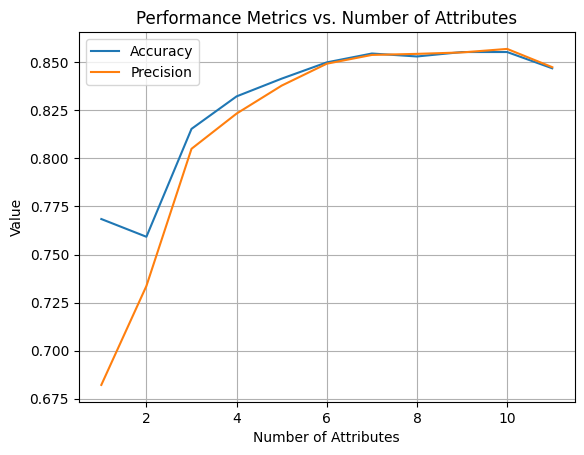

(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol'), 0.8507692307692307, 0.8538768296480846, 0.8507692307692307)
(('fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'density', 'sulphates', 'alcohol'), 0.8507692307692307, 0.8518118163727442, 0.8507692307692307)
(('volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'), 0.8515384615384616, 0.8528482591093117, 0.8515384615384616)
(('volatile acidity', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol'), 0.85, 0.850800658165364, 0.85)
(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'sulphates', 'alcohol'), 0.8515384615384616, 0.8535090055832761, 0.8515384615384616)
(('volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol'), 0.85, 0.8527271508978826, 0.85)
(('volatile acidity', 'citric aci

In [217]:
# save the result to a txt file 
write_model_results('rf_model_results.txt', 'RF Results', rf_results)

graph_model_performance(rf_results)

high_performance_rf = find_high_performance(rf_results,threshold_accuracy=0.85, threshold_precision=0.85, threshold_recall=0.85)

for result in high_performance_rf:
    print(result)

Step 5: Conclusion

5.1 Analysis

Here are some interesting insights from the analysis:

1. The majority of the wine samples are of normal quality, followed by good quality, and a small portion of bad quality.

2. The quality of wine is positively correlated with the alcohol content, while it is negatively correlated with the volatile acidity and density.

3. Among all four models, Random Forest Classifier have the highest precision and accuracy. 

5.2 Share ideas for future work 

1. Investigating the effect of different features on wine quality

The current analysis has focused on using all available features to predict wine quality. However, it would be interesting to investigate the effect of individual features on wine quality. For example, it may be useful to explore how pH, alcohol content, and citric acid levels individually contribute to the quality of the wine.

2. Exploring other data sources

In addition to the wine quality dataset used in this analysis, there are many other datasets on wine-related information. It would be interesting to explore these datasets and see if they can be used to build models that can predict other aspects of wine such as taste, aroma, and price.

3. Comparing with other models

While this analysis has focused on three different classifiers, there are many other machine learning models that could be tested on this dataset. It would be useful to compare the performance of other models, such as deep learning models, to the models used in this analysis.

4. Fine-tuning the models

Fine-tuning the models by optimizing hyperparameters can often improve their performance. In this analysis, most of hyperparameters we used is default. It would be interesting to fine-tune the hyperparameters of the models and see if they can improve the performance.


5.3 Share the links to resources used

Data source: https://archive.ics.uci.edu/ml/datasets/wine+quality